# Store Revenue Exploration: From Analysis to Forecasting

### Reference of Data Set

In [101]:
import webbrowser

In [102]:
website_1 = 'https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset'

In [103]:
website_2 = 'https://www.kaggle.com/datasets/saadharoon27/superstore-dataset'

### Combined the below two data sets and cleaned them into Customer, Sales, Product catogery sets   

In [104]:
webbrowser.open(website_1)
webbrowser.open(website_2)

True

### Getting the necessary libraries and modules installed

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import statsmodels.api as sm
import os
from pandas import Series, DataFrame
from statsmodels.tsa.arima.model import ARIMA

### Reading xlsx files and glimpse of all customers, sales and product data 

In [286]:
customer = pd.read_excel("customer.xlsx", engine='openpyxl')
sales = pd.read_excel("sales.xlsx", engine='openpyxl')
products = pd.read_excel("products.xlsx", engine='openpyxl')

In [287]:
customer.head()

,customer_id,customer_name,customer_age,country,state,city,region,Membership_type,frequency_Purchases,previous_purchases
0,BM-11575,Brendan Murry,55,United States,Kentucky,Gaithersburg,East,Yes,Fortnightly,14
1,LR-16915,Lena Radford,19,United States,Maine,Los Angeles,East,Yes,Fortnightly,2
2,CA-12310,Christine Abelman,50,United States,Massachusetts,San Antonio,East,Yes,Weekly,23
3,BO-11350,Bill Overfelt,21,United States,Rhode Island,Broken Arrow,West,Yes,Weekly,49
4,EB-13975,Erica Bern,45,United States,Oregon,Charlotte,Central,Yes,Annually,31


In [288]:
sales.head()

,serial_number,product_id,order_id,order_date,delivery_mode,payment_mode,customer_id,sales,quantity,profit,discount_applied
0,4918,FUR-BO-10004709,CA-2019-160304,2020-11-11,Standard Class,Venmo,BM-11575,73.94,1,28.2668,Yes
1,4919,TEC-PH-10000455,CA-2019-125206,2020-06-20,Standard Class,Cash,LR-16915,173.94,3,38.2668,Yes
2,4920,OFF-ST-10003692,US-2019-116365,2019-09-19,Standard Class,Credit Card,CA-12310,231.98,2,67.2742,Yes
3,3074,TEC-AC-10002217,CA-2019-105207,2019-10-20,First Class,PayPal,BO-11350,114.46,2,28.6150,Yes
4,8604,TEC-AC-10002942,US-2019-164630,2020-11-02,Standard Class,PayPal,EB-13975,30.08,2,-5.2640,Yes


In [289]:
products.head()

,product_id,Product_name,category,sub_category,average_ratings,color
0,FUR-BO-10004709,"Bush Westfield Collection Bookcases, Medium Ch...",Furniture,Bookcases,3.1,Gray
1,TEC-PH-10000455,"Bush Westfield Collection Bookcases, Medium Ch...",Furniture,Bookcases,3.1,Maroon
2,OFF-ST-10003692,GE 30522EE2,Technology,Phones,3.1,Maroon
3,TEC-AC-10002217,Recycled Steel Personal File for Hanging File ...,Office Supplies,Storage,3.5,Maroon
4,TEC-AC-10002942,Imation Clip USB flash drive - 8 GB,Technology,Accessories,2.7,Turquoise


In [290]:
print(sales.columns)
print(products.columns)
print(customer.columns)

Index(['serial_number', 'product_id', 'order_id', 'order_date',
       'delivery_mode', 'payment_mode', 'customer_id', 'sales', 'quantity',
       'profit', 'discount_applied'],
      dtype='object')
Index(['product_id', 'Product_name', 'category', 'sub_category',
       'average_ratings', 'color'],
      dtype='object')
Index(['customer_id', 'customer_name', 'customer_age', 'country', 'state',
       'city', 'region', 'Membership_type', 'frequency_Purchases',
       'previous_purchases'],
      dtype='object')


### Merging all three files based on Customer Id and Product Id

In [291]:
df2= sales.merge(products, on='product_id', how='left')

In [292]:
df=df2.merge(customer, on='customer_id', how='left')

In [293]:
bar = df.loc[:, ['state', 'sales']]

## Goal 1 : "To determine the overall sales for each state"
### We aim to understand the sales outcomes in various regions.

### State vs State Analysis 

In [294]:
bar_df = bar.groupby('state').sum().reset_index()

In [295]:
bar_df = bar_df.sort_values(by=['sales'])

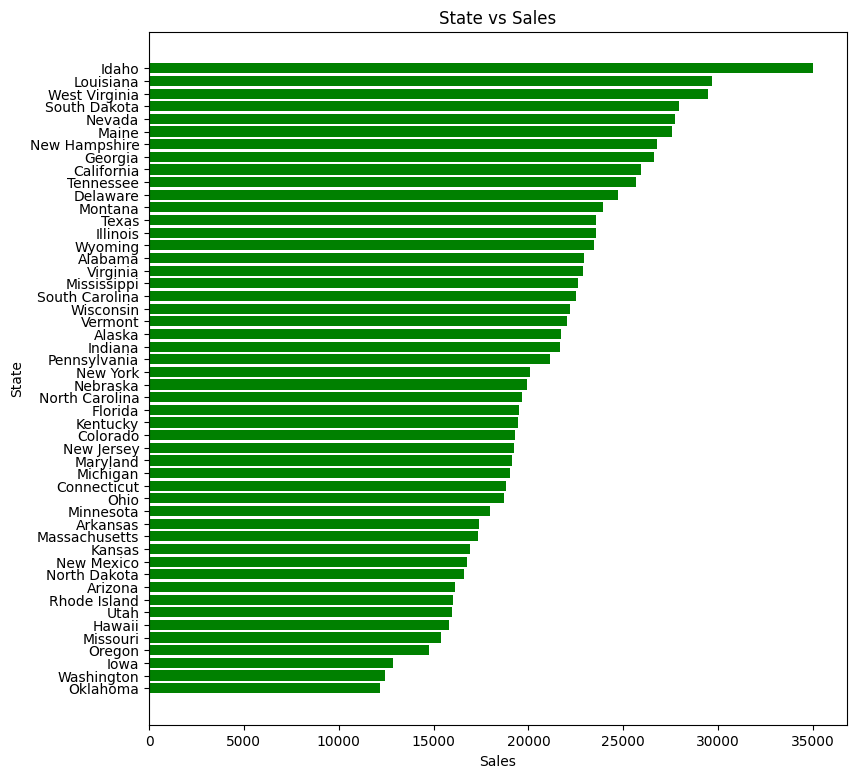

In [296]:
plt.figure(figsize=(9,9))
plt.barh(bar_df['state'], bar_df['sales'], color = 'green')
plt.title('State vs Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()


## Goal 2: "To Find out the total sales of each category" 
## Product Catogery Analysis

In [297]:
pie_df = df.loc[:, ['category', 'sales']]

In [298]:
pie_df = pie_df.groupby('category').sum()

In [299]:
print(pie_df)

                       sales
category                    
Furniture        309476.1586
Office Supplies  404588.0245
Technology       334635.8524


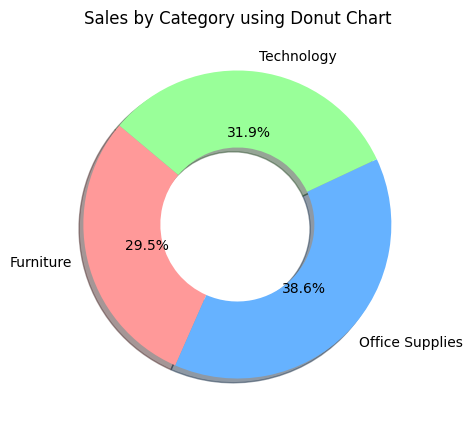

In [300]:
plt.figure(figsize=(7,5))
explode = (0.1, 0.1, 0, 0)
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
plt.pie(pie_df['sales'], 
        labels=pie_df.index, 
        autopct='%1.1f%%',
        startangle=140,    # start angle for the pie slices
        colors=colors,     # custom colors for the pie slices
        shadow=True,       # add shadow for 3D effect
        wedgeprops=dict(width=0.5))  # This makes the pie chart look like a donut

plt.title('Sales by Category using Donut Chart')
plt.show()

## Goal 3: Analyze the sales data and determine the sum of quantities sold for each payment mode
## Payment mode Analysis based on quantity

In [301]:
dn_df = df.loc[:, ['payment_mode', 'quantity']]

In [302]:
dn_df = dn_df.groupby('payment_mode').sum().reset_index()

In [303]:
print(dn_df)

    payment_mode  quantity
0  Bank Transfer      2596
1           Cash      2875
2    Credit Card      2726
3     Debit Card      2596
4         PayPal      2783
5          Venmo      2642


### Bar plot for visualization

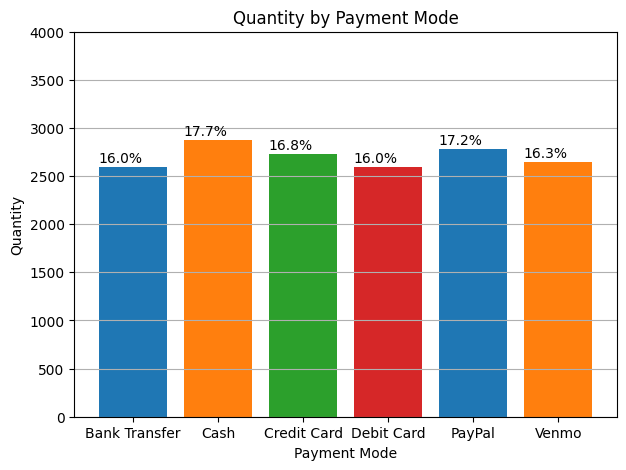

In [304]:
total_quantity = dn_df['quantity'].sum()
plt.figure(figsize=(7,5))
bars = plt.bar(dn_df['payment_mode'], dn_df['quantity'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Payment Mode')
plt.ylabel('Quantity')
plt.title('Quantity by Payment Mode')
plt.grid(axis='y')
plt.ylim(0, 4000)

# Adding percentage labels
for bar in bars:
    height = bar.get_height()
    percentage = (height/total_quantity) * 100
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 50, f'{percentage:.1f}%', ha='center')

plt.show()

## Goal 4: "We aim to analyze the sales data to pinpoint our most prolific customers, those who have made the highest number of purchases." 
### This analysis will provide valuable insights into our top customers and shed light on their buying patterns.

In [114]:
group_data = df.groupby(['customer_id', 'customer_name', 'previous_purchases'])['customer_age'].sum().reset_index()

In [115]:
loyal_cust = group_data.loc[:, ['customer_id', 'customer_name', 'previous_purchases']]

In [116]:
top_loyal_cust = loyal_cust.sort_values('previous_purchases', ascending=False).head(10)

In [117]:
top_loyal_cust

,customer_id,customer_name,previous_purchases
3757,RL-19615,Rob Lucas,81
3893,WB-21850,William Brown,72
3728,PV-18985,Paul Van Hugh,67
3833,SV-20935,Susan Vittorini,64
642,BF-11215,Benjamin Farhat,62
1520,CM-12385,Christopher Martinez,57
2917,EH-13765,Edward Hooks,53
2982,ES-14020,Erica Smith,53
2715,EF7135,Muhammed MacIntyre,50
2717,EF7141,Tamara Dahlen,50


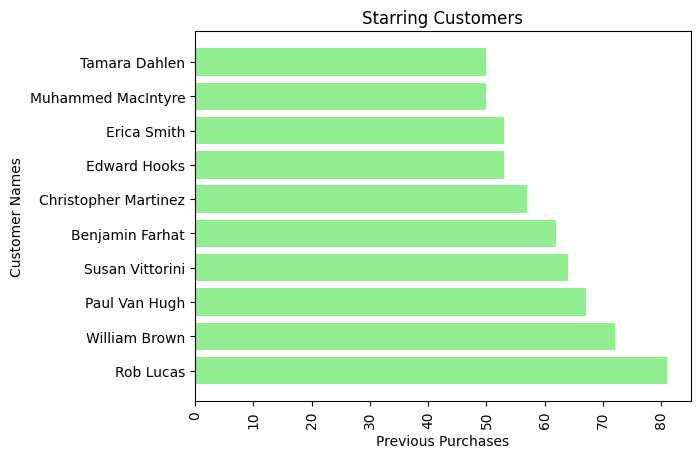

In [118]:
plt.barh(top_loyal_cust['customer_name'], top_loyal_cust['previous_purchases'],color= 'lightgreen')
plt.xticks(rotation=90)
plt.title('Starring Customers')
plt.xlabel('Previous Purchases')
plt.ylabel('Customer Names')
plt.show()

## Goal 5: "We aim to optimize stock for the new store based on sub-category profitability."

#### Find the best-selling category in each state
#### Calculate the total quantity sold for each category in each state

In [305]:
states_gdf = gpd.read_file('us_states.json')
state_category_profit = df.groupby(['state', 'category', 'sub_category'])['quantity'].sum().reset_index()
best_selling_category_in_state = state_category_profit.sort_values(['state', 'quantity'], ascending=[True, False]) \
    .groupby('state').head(1)
merged_data = states_gdf.merge(best_selling_category_in_state, left_on='name', right_on='state')

### Plotting the map based on the best catogeries performance across the states

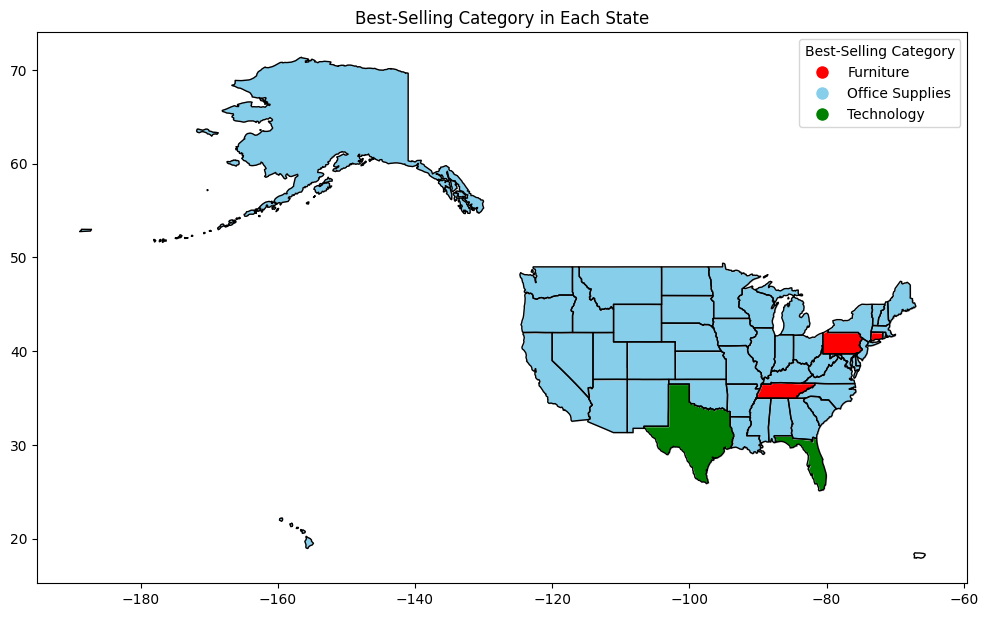

In [309]:
category_colors = {
    'Furniture': 'red',
    'Office Supplies': 'skyblue',
    'Technology': 'green',
}
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
states_gdf.boundary.plot(ax=ax, linewidth=1, color='k')  # Plotting state boundaries
# Loop through merged data and plotting each state with its best-selling category color
for _, row in merged_data.iterrows():
    state_name = row['name']
    category = row['category']
    state_geom = states_gdf[states_gdf['name'] == state_name]
    state_geom.plot(ax=ax, color=category_colors.get(category, 'gray'), linewidth=0.8, edgecolor='0.8')
# Creating a legend for the categories
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=category, markersize=10, markerfacecolor=color)
                  for category, color in category_colors.items()]
plt.legend(handles=legend_handles, title='Best-Selling Category')
plt.title('Best-Selling Category in Each State')
plt.show()

## Calculating the total quantity sold for each subcategory in each category

In [311]:
category_subcategory_profit = df.groupby(['category', 'sub_category'])['quantity'].sum().reset_index()

In [312]:
print("The Best-selling category in all states")
category_subcategory_profit

The Best-selling category in all states


,category,sub_category,quantity
0,Furniture,Bookcases,383
1,Furniture,Chairs,889
2,Furniture,Furnishings,1578
3,Furniture,Tables,516
4,Office Supplies,Appliances,720
5,Office Supplies,Art,1357
6,Office Supplies,Binders,2664
7,Office Supplies,Envelopes,330
8,Office Supplies,Fasteners,393
9,Office Supplies,Labels,608


## Visual Representation of Total Profit by Category and Subcategory

In [313]:
subcategory_pivot = category_subcategory_profit.pivot(index='sub_category', columns='category', values='quantity')

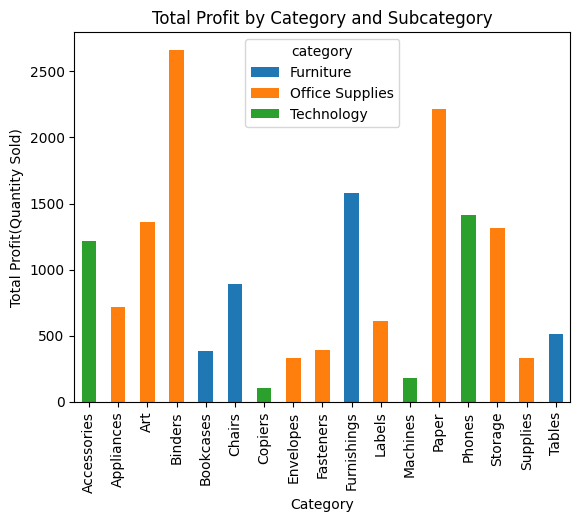

In [314]:
subcategory_pivot.plot(kind='bar', stacked=True)
plt.title("Total Profit by Category and Subcategory")
plt.xlabel("Category")
plt.ylabel("Total Profit(Quantity Sold)")
plt.show()

## Goal 6: "We aim to identify the top-performing products for the most profitable category."

In [320]:
# Find the best-selling subcategory within each of the best-selling categories 
best_selling_subcategory_in_category = category_subcategory_profit.sort_values(['category', 'quantity'], ascending=[True, False]) \
    .groupby('category').head(1)

In [321]:
print("\nIn each category, the best-selling subcategory based on total quantity sold is:")
best_selling_subcategory_in_category


In each category, the best-selling subcategory based on total quantity sold is:


,category,sub_category,quantity
2,Furniture,Furnishings,1578
6,Office Supplies,Binders,2664
16,Technology,Phones,1416


## Best performing products Ranking from 1 to 10

In [322]:
df['order_date'] = pd.to_datetime(df['order_date'])
sales_filtered = df.loc[(df['delivery_mode'] == 'Standard Class') & (df['order_date'] >= '2019-01-01') & (df['order_date'] <= '2020-12-30')]

In [323]:
most_profitable_category = sales_filtered.groupby(['category'])['profit'].sum().idxmax()

In [324]:
sales_by_product = sales_filtered.loc[sales_filtered['category'] == most_profitable_category].groupby(['Product_name'])['sales'].sum().reset_index()

In [1]:
top_product = sales_by_product.sort_values('sales', ascending=False).head(10)
top_product['Rank'] = range(1, 15)

NameError: name 'sales_by_product' is not defined

In [326]:
top_product

,Product_name,sales,Rank
0,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,1
133,Logitech P710e Mobile Speakerphone,6521.250,2
205,Samsung Galaxy Mega 6.3,5991.858,3
186,Plantronics CS510 - Over-the-Head monaural Wir...,5623.150,4
74,Hewlett Packard LaserJet 3310 Copier,5399.910,5
17,Ativa V4110MDD Micro-Cut Shredder,4899.930,6
207,Samsung Galaxy S4,4779.708,7
51,Cubify CubeX 3D Printer Double Head Print,4499.985,8
206,Samsung Galaxy S III - 16GB - pebble blue (T-M...,4174.882,9
21,Bady BDG101FRU Card Printer,3999.950,10


## Goal 7: "Monthly sales trends to identify the trendline pattern."

In [216]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')

In [217]:
monthly_sales = sales.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [219]:
monthly_sales = monthly_sales.set_index('order_date')
monthly_sales.index.freq = 'M'  # Set the frequency to 'M' for monthly data
result = seasonal_decompose(monthly_sales["sales"], model="add")

### Creating a subplot to display the individual components
### Plotting three components 'Trends', 'Seasonal', 'Orginal Monthly Analysis' 

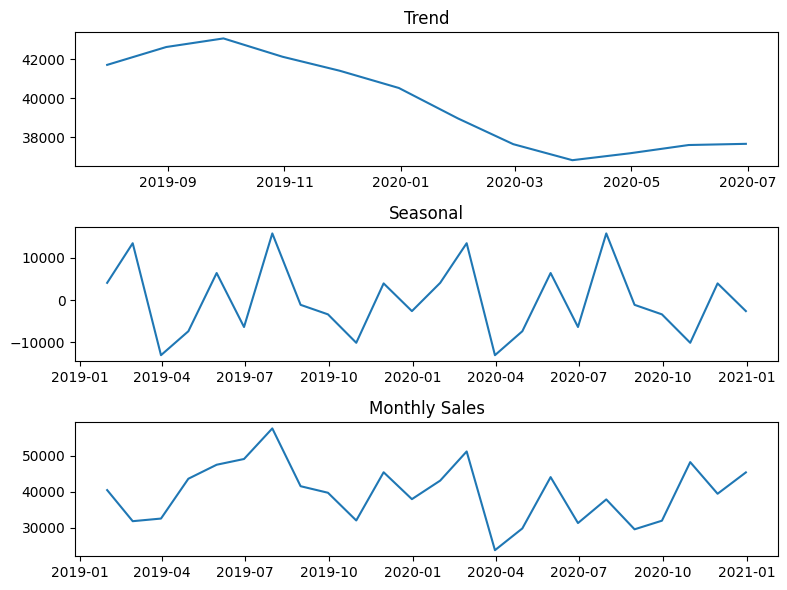

In [327]:
result = seasonal_decompose(monthly_sales["sales"], model="add")
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].plot(result.trend)
axes[0].set_title('Trend')
axes[1].plot(result.seasonal)
axes[1].set_title('Seasonal')
axes[2].plot(monthly_sales["sales"])
axes[2].set_title('Monthly Sales')

plt.tight_layout()
plt.show()

## Goal 8: "Performing a time series dataset consisting of order dates and corresponding sales values."

In [221]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')

In [222]:
f_df = sales.loc[:, ['order_date', 'sales']]

In [223]:
forcast_df = f_df.groupby(['order_date'])['sales'].sum().reset_index()

In [224]:
forcast_df = forcast_df.sort_values(by='order_date')

### The below are order date of products in last 30 days i.e, December 2020
### This data will be used to create a actual sales axis and will be used to compare the predicted forecast axis

In [225]:
forcast_df.tail(30)

,order_date,sales
696,2020-12-02,1369.002
697,2020-12-03,215.846
698,2020-12-04,1741.697
699,2020-12-05,2490.684
700,2020-12-06,1924.644
701,2020-12-07,1963.346
702,2020-12-08,813.494
703,2020-12-09,4841.077
704,2020-12-10,1171.848
705,2020-12-11,507.168


## Goal 9: "Introducing a forecasting model that predicts the sales values based on the above time series dataset."

In [328]:
train_size = int(forcast_df.shape[0] - 30)
train = forcast_df[0:train_size]
test = forcast_df[train_size:]

In [329]:
model = ARIMA(train["sales"], order=(2, 2, 5))

C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [330]:
model_fit = model.fit()

C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [331]:
forecast_values = model_fit.get_forecast(steps=30)

C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\S556524\big-data-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [332]:
forecasted_sales = forecast_values.predicted_mean

In [333]:
forecasted_index = pd.date_range(start=train.index[-1] + pd.DateOffset(days=1), periods=len(forecasted_sales))

In [334]:
actual_values = test['sales']

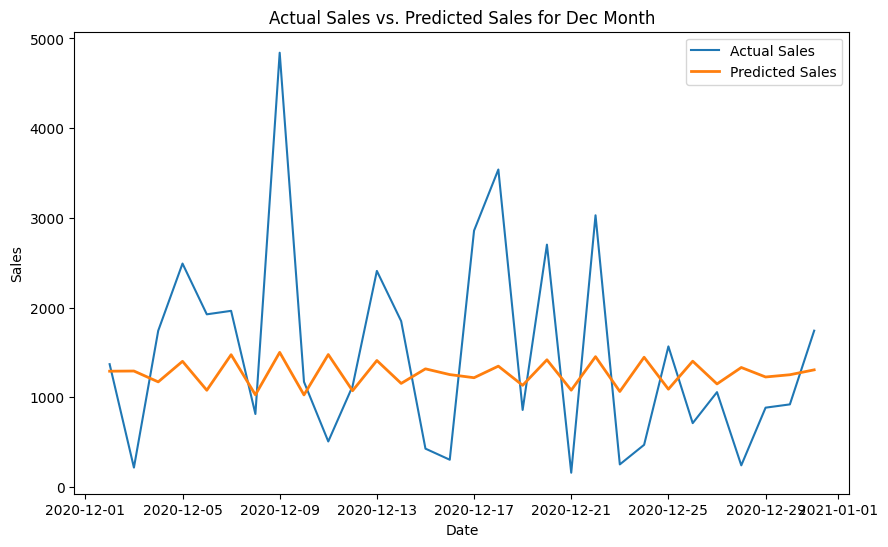

In [335]:
plt.figure(figsize=(10, 6))  # Adjust the width and height values as needed
plt.plot(actual_values.index, actual_values, label='Actual Sales')
plt.plot(forecasted_index, forecasted_sales, label='Predicted Sales',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Predicted Sales for Dec Month')
plt.legend()
plt.show()